In this assessment, you will create visualizations of the data in order to answer the questions about the data.

Be sure to keep your code from question to question, because all five questions relate to the same data table.

Following is the starter code in this assessment. It connects to the houseprices database, which contains a single table named houseprices. Load this table of data into a DataFrame.

In [1]:
# To keep the page organized, do all imports here
from sqlalchemy import create_engine, text
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
prices_df = pd.read_sql_query(text('SELECT * FROM houseprices'), con=engine.connect())

# Remove the connection
engine.dispose()


### Question 1

Determine if the data in saleprice is skewed by illustrating the distribution using a distribution plot. Then to confirm, create a box plot of saleprice.

Choose the best description of the skew of the data.

#### Correct answer: Skewed to the right  (We see the outliers facing toward the right)


<AxesSubplot:xlabel='saleprice', ylabel='Count'>

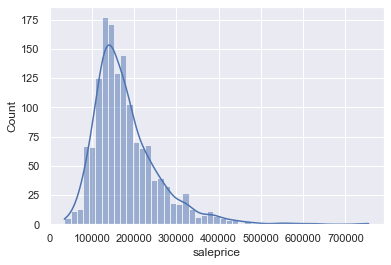

In [2]:
sns.histplot(prices_df['saleprice'], kde=True)

### Question 2

Next look at the lotarea data. Create a box plot of lotarea and see that there are outliers above a lot area of 50k. Create a Series that contains only lotarea rows where the lot area value is <=50k. Create a box plot of this series. 

Choose the best description of the skew of the data.

#### Correct answer: Skewed to the right (We see the outliers facing toward the right)

<AxesSubplot:xlabel='lotarea'>

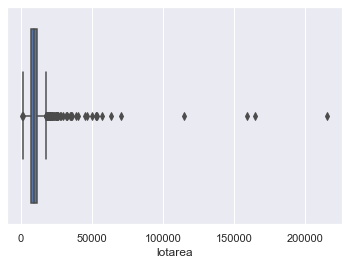

In [3]:
sns.boxplot(x='lotarea', data=prices_df)

Next look at the lotarea data.Â Create a box plot of lotarea and see that there are outliers above a lot area of 50k.Â Create a Series that contains only lotarea rows where the lot area value is <=50k.Â Create a box plot of this series.Â 

Choose the best description of the skew of the data.

### Question 3

Return to using the full dataset. Use a box plot to illustrate how overallcond affects the sale price.

#### Correct answer: The median sales price tends to increase with higher overall condition. However, overall condition 5 homes had the highest median sales price.

<AxesSubplot:xlabel='overallcond', ylabel='saleprice'>

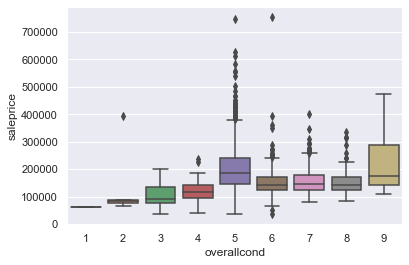

In [4]:
sns.boxplot(x='overallcond', y='saleprice', data=prices_df)

<AxesSubplot:xlabel='lotarea'>

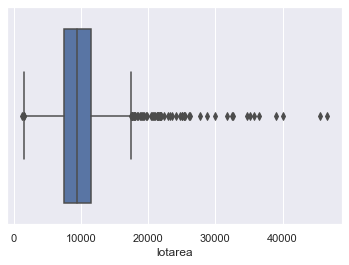

In [5]:
sns.boxplot(prices_df[prices_df['lotarea'] < 50000]['lotarea'])

### Question 4

Update your code from the previous box plot of sales price grouped by overall condition to highlight the difference between having central air conditioning or not.

Do this by adding in the central air conditioning as a hue.

From the choices below, select the condition where 100% of the homes have central air conditioning.

#### Correct answer: 9 (We know this because there is no boxplot at all for this group)

<AxesSubplot:xlabel='overallcond', ylabel='saleprice'>

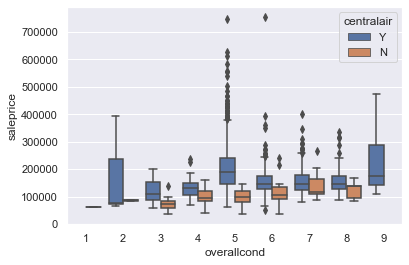

In [6]:
sns.boxplot(x='overallcond', y='saleprice', 
            hue='centralair', data=prices_df)

### Question 5

Using a scatter plot, visually check for a correlation between lotarea and saleprice. What do you see?


#### Correct answer: Weak to no correlation (As X increases, there is not much change in Y)

<AxesSubplot:xlabel='lotarea', ylabel='saleprice'>

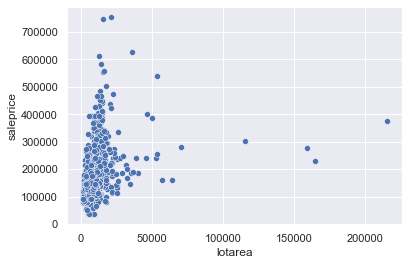

In [7]:
sns.scatterplot(x='lotarea', y='saleprice', data=prices_df)

In [8]:
# We can get the exact correlation coefficient with the `corr()` method
prices_df[['lotarea', 'saleprice']].corr()

,lotarea,saleprice
lotarea,1.000000,0.263843
saleprice,0.263843,1.000000
